## Problem Statement:

A Grocery Store shared the transactional data with you. Your job is to identify the most popular combos that can be suggested to the Grocery Store chain after a thorough analysis of the most commonly occurring sets of menu items in the customer orders. The Store doesn’t have any combo meals. Can you suggest the best combo meals?

#### Exploratory Analysis

- Exploratory Analysis of data & an executive summary (in PPT) of your top findings, supported by graphs.
- Are there trends across months/years/quarters/days etc. that you are able to notice?

#### Use of Market Basket Analysis (Association Rules)

- Write Something about the association rules and their relevance in this case
- Add KNIME workflow Image 
- Write about threshold values of Support and Confidence

#### Associations Identified 

- Put the associations in a tabular manner
- Explain about support, confidence, & lift values that are calculated                                 

#### A suggestion of Possible Combos with Lucrative Offers

- Write recommendations
- Make discount offers or combos (or buy two get one free) based on the associations and your experience

### Importing Libraries

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
sns.set(color_codes=True)
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

#### Read and view data

In [3]:
df = pd.read_csv("dataset_group.csv")

In [4]:
df.head(10)

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose
5,01-01-2018,1,flour
6,01-01-2018,1,soda
7,01-01-2018,1,butter
8,01-01-2018,1,beef
9,01-01-2018,1,aluminum foil


In [34]:
df.nunique()

Date         603
Order_id    1139
Product       37
dtype: int64

### Data Pre-processing
###### Checking for number of rows and columns:

In [5]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  20641 
no. of columns:  3


In [10]:
df_num = df.select_dtypes(['float64','int64','int32'])
df_cat = df.select_dtypes(['object'])

###### Cheching data type of data features:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


###### Checking for Null and missing values in the dataset :

In [12]:
df.isnull().sum()

Date        0
Order_id    0
Product     0
dtype: int64

###### Checking the description of dataset

In [16]:
df.describe()

,Order_id
count,20641.000000
mean,575.986289
std,328.557078
min,1.000000
25%,292.000000
50%,581.000000
75%,862.000000
max,1139.000000


In [15]:
df_cat.describe()

,Date,Product
count,20641,20641
unique,603,37
top,08-02-2019,poultry
freq,183,640


###### unique values for categorical variables:

In [17]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

DATE :  603
26-02-2020      3
05-09-2019      4
24-09-2018      4
11-03-2019      4
03-09-2019      5
             ... 
17-05-2018    123
01-03-2018    127
06-03-2018    134
20-02-2019    146
08-02-2019    183
Name: Date, Length: 603, dtype: int64


PRODUCT :  37
hand soap                       502
sandwich loaves                 523
fruits                          529
pork                            531
sugar                           533
sandwich bags                   536
spaghetti sauce                 536
pasta                           542
laundry detergent               542
tortillas                       543
individual meals                544
yogurt                          545
ketchup                         548
dishwashing liquid/detergent    551
all- purpose                    551
mixes                           554
milk                            555
flour                           555
butter                          555
paper towels                    556
beef            

###### Checking for skewness in this dataset :

In [19]:
df.skew()

Order_id   -0.02807
dtype: float64

## Data Visualization:
### Univariate Analysis for Numeric Variable

In [20]:
df_num = df.select_dtypes(['float64','int64','int32'])
df_cat = df.select_dtypes(['object'])

In [21]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde= True, bins=nbins, color= 'orange');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column], color= 'orange')
    
    plt.show()

In [22]:
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

1

Description of Order_id
----------------------------------------------------------------------------
count    20641.000000
mean       575.986289
std        328.557078
min          1.000000
25%        292.000000
50%        581.000000
75%        862.000000
max       1139.000000
Name: Order_id, dtype: float64 Distribution of Order_id
----------------------------------------------------------------------------


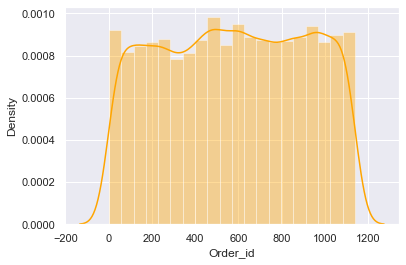

BoxPlot of Order_id
----------------------------------------------------------------------------


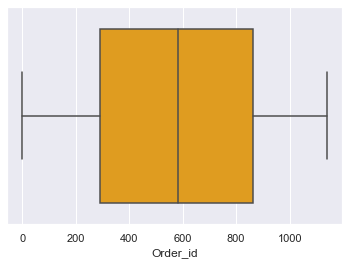

In [23]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

### Univariate Analysis for Cateforical Variables:

In [27]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_cat[cat_column].value_counts())
    plt.figure()
    df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column, color= 'orange')
    plt.xticks(rotation=90)
    plt.show()
    print("       ")

In [28]:
lstcatcolumns = list(df_cat.columns.values)
len(lstcatcolumns)

2

Details of Date
----------------------------------------------------------------
08-02-2019    183
20-02-2019    146
06-03-2018    134
01-03-2018    127
17-05-2018    123
             ... 
03-09-2019      5
05-09-2019      4
11-03-2019      4
24-09-2018      4
26-02-2020      3
Name: Date, Length: 603, dtype: int64


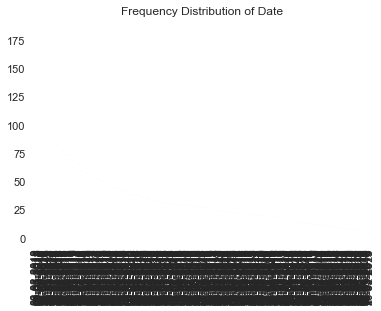

       
Details of Product
----------------------------------------------------------------
poultry                         640
soda                            597
cereals                         591
ice cream                       579
cheeses                         578
waffles                         575
soap                            574
lunch meat                      573
bagels                          573
eggs                            570
juice                           570
toilet paper                    569
dinner rolls                    567
aluminum foil                   566
coffee/tea                      565
shampoo                         562
beef                            561
paper towels                    556
butter                          555
milk                            555
flour                           555
mixes                           554
all- purpose                    551
dishwashing liquid/detergent    551
ketchup                         548
yogurt  

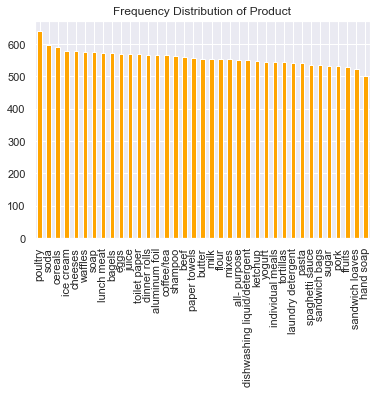

In [29]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

### Bivariate Analysis

### Outlier check

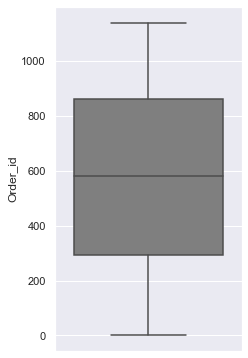

In [30]:
plt.figure(figsize = (20,10))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(2,7, i + 1)
    sns.boxplot(y = df_num[feature_list[i]], data = df_num, palette='gray_r')
    plt.tight_layout()